# The relationship between Zn and diabetes
- Author: Yiran Jing
- Date: 7 Oct

### Key variable description

#### Response
**DIABBC** is a `categorial variable`, the value has different meaning:
- 1: Ever told has diabetes mellitus, still current and long term
- 3: Ever told has diabetes mellitus, not current
- 5: Never told has diabetes mellitus


#### Predictor
- **ZINCT1** Zinc (total) Day 1 mg 
   - (for all person)
- **ZINCT2** Zinc (total) Day 2 mg 
   - (for all persons who completed second (CATI) nutrition interview)
- **SEX**
  - 1: Male
  - 2: Female
  
## Findings:
1. **The mean of zn in the diabetes group (DIABBC = 1) is lower than that in the health group (DIABBC = 1)**, Confirm by:
    - Distrubtion visualization
    - Hypothesis testing on the group mean with 5% confidence level
    
2. No clear difference between Zn and sex/gender

## Questions: 
See below. 



In [1]:
import pandas as pd
import pyspark
from datetime import datetime
import os.path 
import datetime
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import calendar
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals import joblib
from scipy.stats import norm, skew
import statsmodels.api as sm
blue = sns.color_palette('Blues')[-2]
color = sns.color_palette() 
sns.set_style('darkgrid') 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
import nltk
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In /Users/yiranjing/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yiranjing/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yiranjing/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/yiranjing/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/yiranjing/miniconda3/lib/pytho

#### Load and join dataset

In [6]:
merged_food_nutr_binom = pd.read_csv('data/merged_food_nutr_binom.csv')

In [7]:
merged_food_nutr_binom.head()

,ABSHID,ABSPID,BMR,EIBMR1,EIBMR2,ENERGYT1,ENERGYT2,ENRGYT1,ENRGYT2,MOISTT1,MOISTT2,PROTT1,PROTT2,FATT1,FATT2,CHOWSAT1,CHOWSAT2,CHOWOAT1,CHOWOAT2,STARCHT1,STARCHT2,SUGART1,SUGART2,FIBRET1,FIBRET2,ALCT1,ALCT2,PREVAT1,PREVAT2,PROVAT1,PROVAT2,RETEQT1,RETEQT2,B1T1,B1T2,B2T1,B2T2,B3T1,B3T2,NIACINT1,NIACINT2,FOLATT1,FOLATT2,FOLICT1,FOLICT2,TOTFOLT1,TOTFOLT2,FOLEQT1,FOLEQT2,B6T1,B6T2,B12T1,B12T2,VITCT1,VITCT2,VITET1,VITET2,CALCT1,CALCT2,IODINET1,IODINET2,IRONT1,IRONT2,MAGT1,MAGT2,PHOST1,PHOST2,POTAST1,POTAST2,SELT1,SELT2,SODIUMT1,SODIUMT2,ZINCT1,ZINCT2,CAFFT1,CAFFT2,CHOLT1,CHOLT2,SATFATT1,SATFATT2,MUFATT1,MUFATT2,PUFATT1,PUFATT2,LAT1,LAT2,ALAT1,ALAT2,LCN3T1,LCN3T2,TRANST1,TRANST2,PROPER1,PROPER2,FATPER1,FATPER2,LAPER1,LAPER2,ALAPER1,ALAPER2,CHOPER1,CHOPER2,SUGPER1,SUGPER2,STARPER1,STARPER2,ALCPER1,ALCPER2,SATPER1,SATPER2,TRANPER1,TRANPER2,FIBRPER1,FIBRPER2,MONOPER1,MONOPER2,POLYPER1,POLYPER2,GRAINS1N,WHOLGR1N,REFGRA1N,VEGLEG1N,GREENS1N,VGORSV1N,STARCH1N,LEGVEG1N,OTHVEG1N,FRUIT1N,FRSHF1N,DRFR1N,FRJUIC1N,DAIRY1N,DAIRHF1N,DAIRMF1N,DAIRLF1N,MEAT1N,MEATL1N,MEATLD1N,RDMTL1N,RDMTLU1N,RDMTLP1N,RDMTN1N,RDMTNU1N,RDMTNP1N,PLTYL1N,PLTYLU1N,FISH1N,EGGS1N,LEGMT1N,NUTS1N,WATER1N,UNSAT1N,FRESUG1N,ADDSUG1N,MEATLG1N,MEATDG1N,RDMTLG1N,RDMLUG1N,RDMLPG1N,RDMTNG1N,RDMNUG1N,RDMNPG1N,PLTYLG1N,PLTLUG1N,PLTLPG1N,PLTYNG1N,PLTNUG1N,PLTNPG1N,RDMTTG1N,RDMTUG1N,PLTYTG1N,PLTYUG1N,WATERG1N,WATERG2N,GRAINS2N,VEGLEG2N,FRUIT2N,FRSHF2N,MEAT2N,DAIRY2N,MEATLD2N,MEATL2N,WATER2N,UNSAT2N,FRESUG2N,ADDSUG2N,PEFRESD1,PEADDSD1,PEFRESD2,PEADDSD2,BMR_MISS,EIBMR1_MISS,EIBMR2_MISS,GRAMWGT,FOODCODC,ENERGYWF,ENERGYNF,MOISTURE,PROTEIN,FATG,CHOWSA,CHOWOSA,STARCH,SUGARS,FIBRE,ALCOHOL,PREVITA,PROVITA,RETEQV,B1MG,B2MG,B3MG,NIACINEQ,FOLATEUG,FOLACID,TOTFOL,FOLATEQV,B6MG,B12UG,VITCMG,VITEMG,CALMG,IODINEUG,IRONMG,MAGMG,PHOSMG,POTASMG,SELUG,SODMG,ZINCMG,CAFFMG,CHOLMG,SFAG,MUFAG,PUFAG,LAG,ALAG,LCN3MG,TRANSMG,COMBCODE,EATTIMEC,EATOCC,DAYNUM,TWDIG,THRDIG,FIVDIG,DISCFLG,GRNSRV,WGSRV,...,FRSHFSRV,DRFRSRV,FRJCSRV,DAIRYSRV,HFDASRV,HFCHSSRV,HFPOWSRV,MFDASRV,MFMLKSRV,MFEVPSRV,MFCONSRV,MFCHHSRV,MFCHSSRV,MFYOGSRV,MFALTSRV,MFSNASRV,LFDASRV,LFMLKSRV,LFEVPSRV,LFCONSRV,LFCHHSRV,LFCHSSRV,LFYOGSRV,LFALTSRV,LFSNASRV,LFPOWSRV,MEATSRV,RMTLSRV,RMTLUSRV,RMTLPSRV,RMTNSRV,RMTNUSRV,RMTNPSRV,PLYLSRV,PLYLUSRV,PLYLPSRV,PLYNSRV,PLYNUSRV,PLYNPSRV,FISHSRV,EGGSSRV,LEGMTSRV,LEGBSRV,TOFUSRV,NUTSSRV,WATRSRV,UNSTSRV,UNSTSSRV,UNSTOSRV,NUTFTSRV,GRNGM,WGGM,WGBRGM,WGGNGM,WGOAGM,WGBFGM,WGSVGM,WGCRGM,WGMFGM,WGFLGM,RFGRGM,RFBRGM,RFGNGM,RFOAGM,RFBFGM,RFSVGM,RFCRGM,RFMFGM,RFFLGM,VEGGM,VGGRGM,VGORGM,STARGM,LEGVGGM,OTHVGGM,OWHLVGM,OVGJGM,FRUITGM,FRSHFGM,DRFRGM,FRJCGM,DAIRYGM,HFDAGM,HFCHSGM,HFPOWGM,MFDAGM,MFMLKGM,MFEVPGM,MFCONGM,MFCHHGM,MFCHSGM,MFYOGGM,MFALTGM,MFSNAGM,LFDAGM,LFMLKGM,LFEVPGM,LFCONGM,LFCHHGM,LFCHSGM,LFYOGGM,LFALTGM,LFSNAGM,LFPOWGM,MEATGM,RMTLGM,RMTLUGM,RMTLPGM,RMTNGM,RMTNUGM,RMTNPGM,PLYLGM,PLYLUGM,PLYLPGM,PLYNGM,PLYNUGM,PLYNPGM,FISHGM,EGGSGM,LEGMTGM,LEGBGM,TOFUGM,NUTSGM,WATRGM,UNSTGM,UNSTSGM,UNSTOGM,NUTFTGM,ADDSGGRM,FRESGGRM,MTTLSRV,MTTNSRV,RMTTSRV,RMTTUSRV,PLYTSRV,PLYTUSRV,MTTLGM,MTTNGM,RMTTGM,RMTTUGM,PLYTGM,PLYTUGM,COMBCODE_MISS,EATTIMEC_MISS,EATOCC_MISS,BMISC,AGEC,SMSBC,COBBC,FEMLSBC,PHDKGWBC,PHDCMHBC,EXLWTBC,EXLWMBC,EXLWVBC,PHDCMWBC,SF2SA1QN,INCDEC,DIABBC,HCHOLBC,HSUGBC,HYPBC,ADTOTSE,BDYMSQ04,DIASTOL,DIETQ12,DIETQ14,DIETQ5,DIETQ8,DIETRDI,SABDYMS,SEX,SLPTIME,SMKDAILY,SMKSTAT,SYSTOL,ALTNTR,ALTRESB,APOBNTR,APOBRESB,B12RESB,BIORESPC,CHOLNTR,CHOLRESB,CVDMEDST,DIAHBRSK,FASTSTAD,FOLATREB,GGTNTR,GGTRESB,GLUCFPD,GLUCFREB,HBA1PREB,HDLCHREB,LDLNTR,LDLRESB,TRIGNTR,TRIGRESB,BMISC_MISS,SMSBC_MISS,FEMLSBC_MISS,PHDKGWBC_MISS,PHDCMHBC_MISS,PHDCMWBC_MISS,INCDEC_MISS,ADTOTSE_MISS,BDYMSQ04_MISS,DIASTOL_MISS,DIETQ12_MISS,DIETQ14_MISS,DIETRDI_MISS,SABDYMS_MISS,SLPTIME_MISS,SMKDAILY_MISS,SMKSTAT_MISS,SYSTOL_MISS,ALTNTR_MISS,ALTRESB_MISS,APOBNTR_MISS,APOBRESB_MISS,B12RESB_MISS,BIORESPC_MISS,CHOLNTR_MISS,CHOLRESB_MISS,CVDMEDST_MISS,DIAHBRSK_MISS,FASTSTAD_MISS,FOLATREB_MISS,GGTNTR_MISS,GGTRESB_MISS,GLUCFPD_MISS,GLUCFREB_MISS,HBA1PREB_MISS,HDLCHREB_

### Relationship between ZINCT1 and ZINCT2

In [4]:
selected_col = ["DIABBC", "ZINCT1","ZINCT2", "AGEC","SEX", "INCDEC"]
data = merged_food_nutr_binom

<AxesSubplot:>

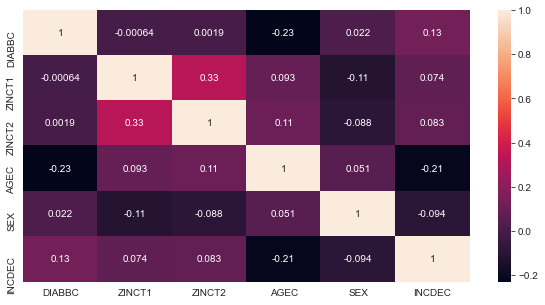

In [5]:
### heatmap on selected columns
corr = data[selected_col].corr()
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr, annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax=ax)


### Distribution of Zn conditional on Diabbc

Text(0.5, 0.98, 'Distribution of Zn conditional on Diabbc')

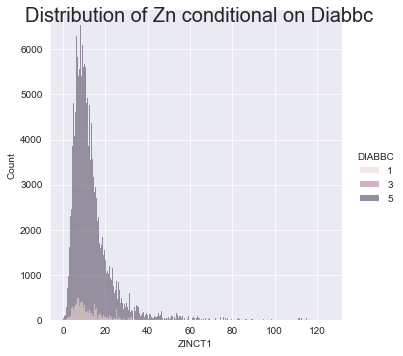

In [15]:
ax = sns.displot(merged_food_nutr_binom, x="ZINCT1", hue="DIABBC")
ax.fig.suptitle('Distribution of Zn1 conditional on Diabbc', fontsize=20)

From plot above, we can see that the dist of ZINCT1 are right-skewed, thus we do transformation

Text(0.5, 0.98, 'Distribution of Zn2 conditional on Diabbc')

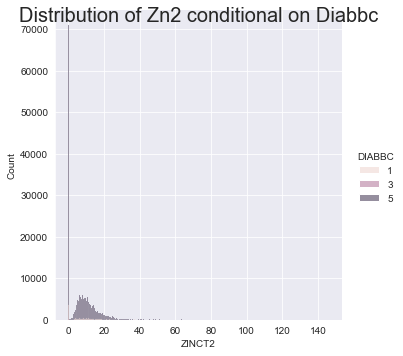

In [26]:
ax = sns.displot(merged_food_nutr_binom, x="ZINCT2", hue="DIABBC")
ax.fig.suptitle('Distribution of Zn2 conditional on Diabbc', fontsize=20)

From the plot above we can see that, ZINCT2 has lots of missing value (0) as not all people attend the day 2 testing, thus we create another group removing rows containing ZINCT2 = 0

In [57]:
new_data_ZINCT2 = merged_food_nutr_binom[merged_food_nutr_binom['ZINCT2'] > 0] # remove the rows with missing value
new_data_ZINCT1 = merged_food_nutr_binom[merged_food_nutr_binom['ZINCT1'] > 0] # remove the rows with missing value
new_data_ZINCT3 = new_data_ZINCT1[new_data_ZINCT1['ZINCT2'] > 0] # remove the rows with missing value

In [58]:
merged_food_nutr_binom['log_ZINCT1'] = np.log(merged_food_nutr_binom['ZINCT1']+1) 
merged_food_nutr_binom['log_ZINCT2'] = np.log(merged_food_nutr_binom['ZINCT2']+1)

new_data_ZINCT1['log_ZINCT1'] = np.log(new_data_ZINCT1['ZINCT1']) 
#new_data_ZINCT1['log_ZINCT2'] = np.log(new_data_ZINCT1['ZINCT2']) 

#new_data_ZINCT2['log_ZINCT1'] = np.log(new_data_ZINCT2['ZINCT1']) 
new_data_ZINCT2['log_ZINCT2'] = np.log(new_data_ZINCT2['ZINCT2']) 

new_data_ZINCT3['log_ZINCT1'] = np.log(new_data_ZINCT3['ZINCT1']) 
new_data_ZINCT3['log_ZINCT2'] = np.log(new_data_ZINCT3['ZINCT2']) 

Text(0.5, 0.98, 'Distribution of LOG_Zn conditional on Diabbc')

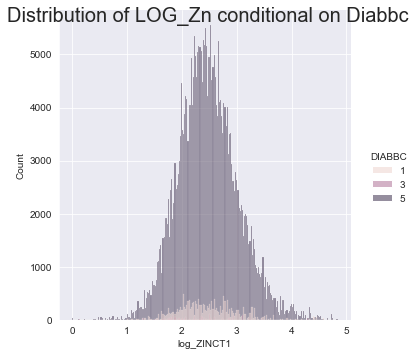

In [22]:
ax = sns.displot(merged_food_nutr_binom, x="log_ZINCT1", hue="DIABBC")
ax.fig.suptitle('Distribution of LOG_Zn conditional on Diabbc', fontsize=20)

Text(0.5, 0.98, 'Distribution of LOG_Zn conditional on Diabbc')

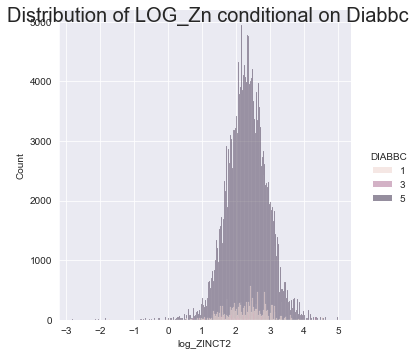

In [60]:
ax = sns.displot(new_data_ZINCT2, x="log_ZINCT2", hue="DIABBC")
ax.fig.suptitle('Distribution of LOG_Zn conditional on Diabbc', fontsize=20)

From plot above, we can see that the distribution of zn in the healthy group (Diabbc = 5) looks quite different from that of diabete gruop (Diabbc = 1), mainly since that the we have much more observations of group (Diabbc = 5) than that of group (Diabbc = 1).

So it is hard to fingure out is the mean of zn in these groups are different. So let's try hypothesis testing!

### T test on the mean of Zn (healthy group (Diabbc = 5)  VS diabete gruop (Diabbc = 1))

> T- Test :- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

>  Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

- H0: The mean of Zn in healthy group (Diabbc = 5) and diabete gruop (Diabbc = 1) are the same
- H1: The mean of Zn in two groups are different
- **Our testing is based on the data removing the missing value**
- If the p_value < 0.05, it means that the mean of two groups are different
- From the values below, we can see that the mean of two groups are statistically different since (p_value < 0.05)

In [63]:
from scipy.stats import ttest_ind

diabetes_group = new_data_ZINCT1[new_data_ZINCT1['DIABBC']==1]
healthy_group = new_data_ZINCT1[new_data_ZINCT1['DIABBC']==5]

diabetes_group2 = new_data_ZINCT2[new_data_ZINCT2['DIABBC']==1]
healthy_group2 = new_data_ZINCT2[new_data_ZINCT2['DIABBC']==5]

diabetes_group3 = new_data_ZINCT3[new_data_ZINCT3['DIABBC']==1]
healthy_group3 = new_data_ZINCT3[new_data_ZINCT3['DIABBC']==5]

print("Mean of healthy group of ZINCT1:", np.mean(healthy_group['ZINCT1']))
print("Mean of diabetes group of ZINCT1:", np.mean(diabetes_group['ZINCT1']))
print("T test on the ZINCT1:")
print(ttest_ind(diabetes_group['ZINCT1'], healthy_group['ZINCT1']))
print(ttest_ind(diabetes_group3['ZINCT1'], healthy_group3['ZINCT1']))


print("\nMean of healthy group of ZINCT2:", np.mean(healthy_group2['ZINCT2']))
print("Mean of diabetes group of ZINCT2:", np.mean(diabetes_group2['ZINCT2']))
print("T test on the ZINCT2:")
print(ttest_ind(diabetes_group2['ZINCT2'], healthy_group2['ZINCT2']))
print(ttest_ind(diabetes_group3['ZINCT2'], healthy_group3['ZINCT2']))


Mean of healthy group of ZINCT1: 12.97815359978411
Mean of diabetes group of ZINCT1: 13.050362033318768
T test on the ZINCT1:
Ttest_indResult(statistic=0.9806905545989553, pvalue=0.3267460602106639)
Ttest_indResult(statistic=-2.0598358160023644, pvalue=0.039415210584805634)

Mean of healthy group of ZINCT2: 12.101513714313034
Mean of diabetes group of ZINCT2: 11.765940406749392
T test on the ZINCT2:
Ttest_indResult(statistic=-4.826349784189278, pvalue=1.391351520099029e-06)
Ttest_indResult(statistic=-4.838578831815014, pvalue=1.3084391844408613e-06)


### But questions: 
#### Q1: should the mean of Zn in healthy group larger than the mean of Zn in diabetes group? 
in the data.
Mean of healthy group of ZINCT1 (12.978)< Mean of diabetes group of ZINCT1 (13.050)
but 
Mean of healthy group of ZINCT2 (12.102)> Mean of diabetes group of ZINCT2 (11.766)
**Which variable (ZINCT1 or ZINCT2) is realiable? or both correct?**

#### Q2: the difference of the group mean above looks not large, is it significant in the real world?


### Distribution of Zn conditional on Diabbc and Sex

**From the plot below, no clear difference between zn and sex**

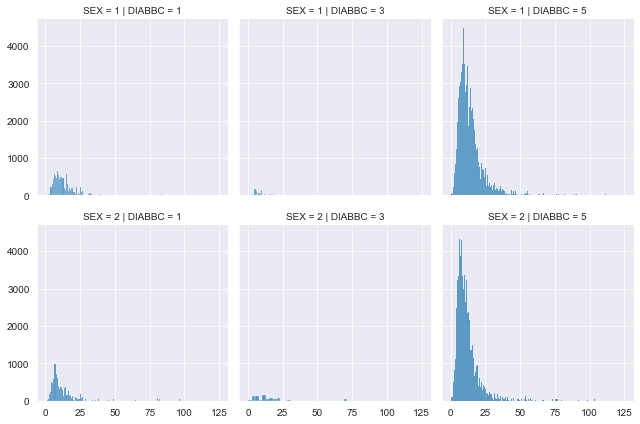

In [51]:
g = sns.FacetGrid(new_data_ZINCT1, col="DIABBC",  row="SEX")
g.map_dataframe(sns.histplot, x="ZINCT1")

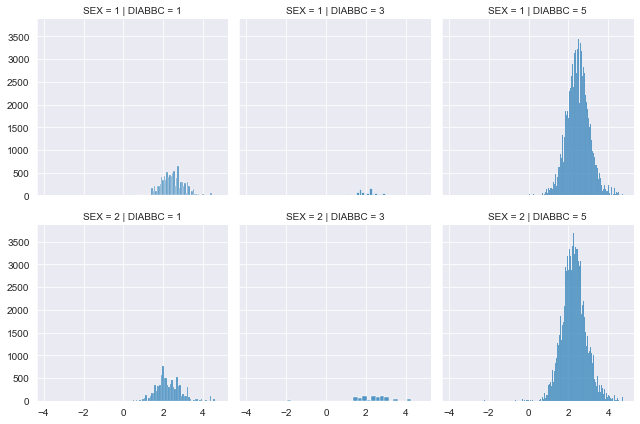

In [52]:
g = sns.FacetGrid(new_data_ZINCT1, col='DIABBC',  row="SEX")
g.map_dataframe(sns.histplot, x="log_ZINCT1")

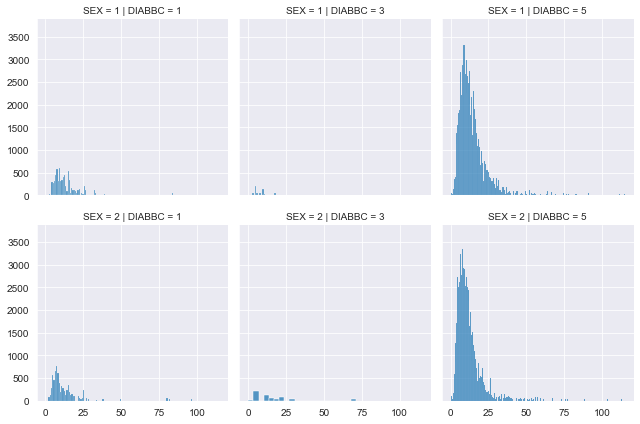

In [53]:
g = sns.FacetGrid(new_data_ZINCT2, col="DIABBC",  row="SEX")
g.map_dataframe(sns.histplot, x="ZINCT1")

### Relationship between ZINCT1 and ZINCT2

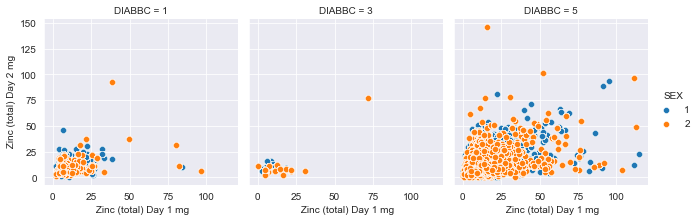

In [46]:
# the plot below are the one remove missing values
g = sns.FacetGrid(new_data_ZINCT2, col='DIABBC',  hue="SEX")
g.map_dataframe(sns.scatterplot, x="ZINCT1", y="ZINCT2")
g.set_axis_labels(" Zinc (total) Day 1 mg", " Zinc (total) Day 2 mg")
g.add_legend()

From the plot above, we can see some outliers in the female group (sex = 2)

### Question:
Are the outliers in the data are mis-recorded?? (See some points are moe than 50 mg)

### Combine ZINCT1 and ZINCT2

In [61]:
new_data_ZINCT3['mean_ZINCT'] = (new_data_ZINCT3['ZINCT1'] + new_data_ZINCT3['ZINCT2'])/2

In [62]:
merged_food_nutr_binom.to_csv('data/merged_food_nutr_binom_7Oct.csv', index=False)